<a href="https://colab.research.google.com/github/shubham121c/customer_conversion_project_GUVI/blob/main/customer_conversion_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer conversion perdiction-project (shubham chavan- shubham121c@gmail.com)


In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp

df = pd.read_csv('/content/Customer Conversion Prediction - Customer Conversion Prediction.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


EDA-to understand patternts in the data

In [167]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [168]:
df.shape


(45211, 11)

Finding out unique values in all the columns

In [169]:
print(df['job'].unique())
print(df['marital'].unique())
print(df['education_qual'].unique())
print(df['call_type'].unique())
print(df['day'].unique())
print(df['num_calls'].unique())
print(df['prev_outcome'].unique())
print(df['mon'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
['unknown' 'failure' 'other' 'success']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [170]:
df.dtypes


age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [171]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

**No null values in our data**

Cheking for duplicate values in data

In [172]:
df.duplicated().sum()


6

In [173]:
df = df.drop_duplicates()


In [174]:
df.duplicated().sum()


0

**After removing 6 duplicates now the data set id free of duplicates**

Finding out number of yes and no in the target column

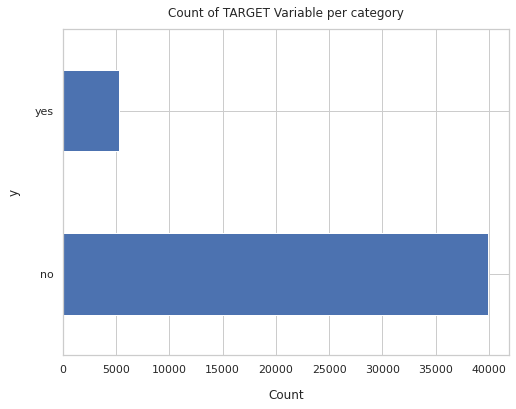

In [175]:
df['y'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("y", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [176]:
df['y'].value_counts()


no     39916
yes     5289
Name: y, dtype: int64

In [177]:
100*df['y'].value_counts()/len(df['y'])


no     88.299967
yes    11.700033
Name: y, dtype: float64

Therefore we can see around 12% traget is actully converted into the customers
the data looks imbalanced we might need to use imbalnced lerning techninques 

Univarient and bivarient analysis 

In [178]:
pd.crosstab(df['job'],df['y'])

y,no,yes
job,,
admin.,4539,631
blue-collar,9022,708
entrepreneur,1364,123
housemaid,1131,109
management,8156,1301
retired,1748,516
self-employed,1392,187
services,3784,369
student,669,269


target group having blue collar, management, technician, admin and service jobs are the major group of people who subscribe to the service

Text(0, 0.5, 'Percent')

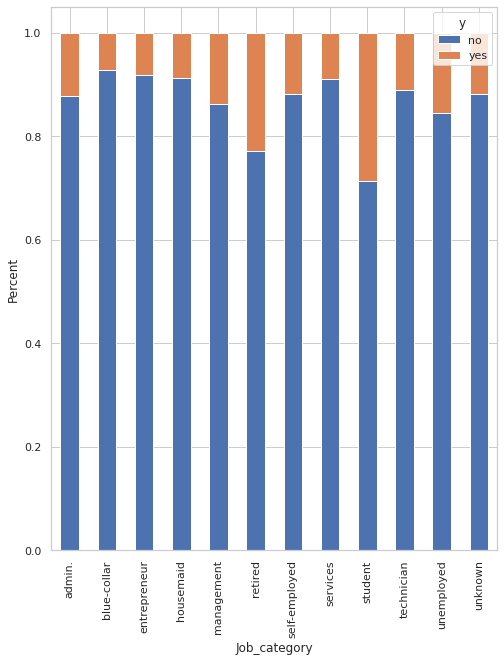

In [179]:
job=pd.crosstab(df['job'],df['y'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,10))
plt.xlabel('Job_category')
plt.ylabel('Percent')

surpringly retired and student targets are the one who suscribed to service

In [180]:
df['y'].replace('no', 0,inplace=True)
df['y'].replace('yes', 1,inplace=True)

In [181]:
import seaborn as sns

<Axes: >

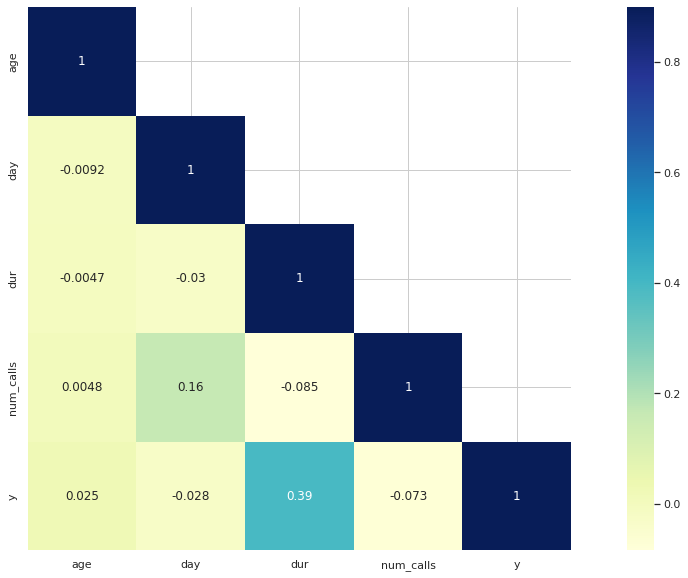

In [182]:
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

duration feature has most affect on target

Outlier Deduction


<Axes: xlabel='age'>

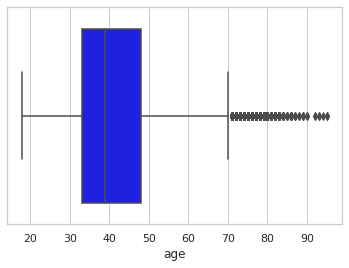

In [183]:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='blue')

outliers in age column

In [184]:
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 70.5 Lower bound : 10.5


In [185]:
df.age = df.age.clip(10.5,70.5)

checking outliers in duration  column

removing the outliers from age columns

<Axes: xlabel='dur'>

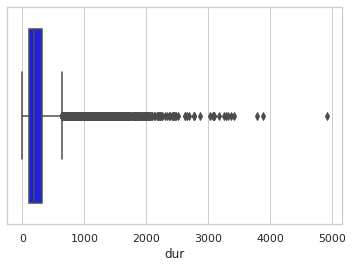

In [186]:
sns.set(style="whitegrid")
sns.boxplot(x=df['dur'], color='blue')

In [187]:
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 643.0 Lower bound : -221.0


adjusting the outliers and taking lower bound to zero

In [188]:
df.dur = df.dur.clip(0,643)

In [189]:
df.dur.describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

encoding the categorical data

<Axes: xlabel='num_calls'>

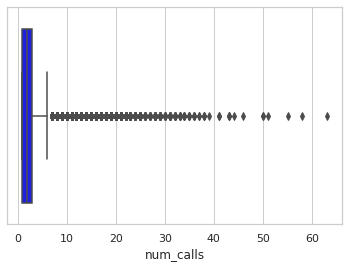

In [190]:
sns.set(style="whitegrid")
sns.boxplot(x=df['num_calls'], color='blue')

In [191]:
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [192]:
df.num_calls = df.num_calls.clip(0,6.0)

**EDA: understanding the relationship between features and target**

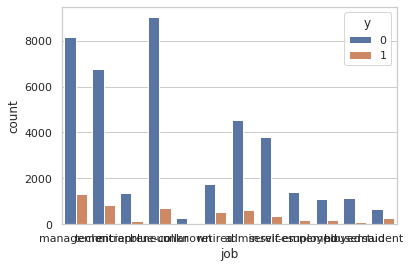

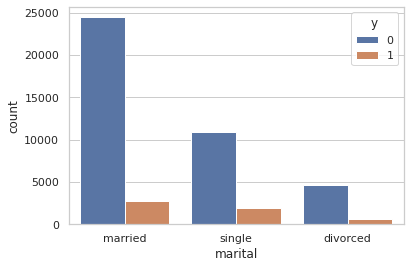

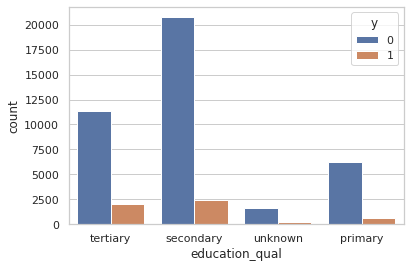

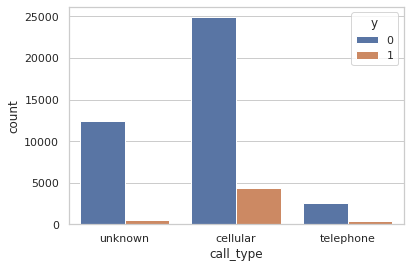

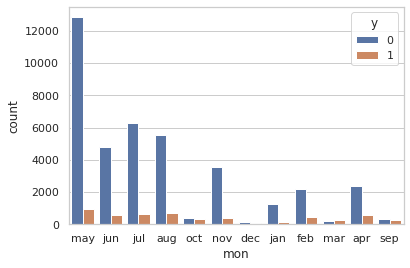

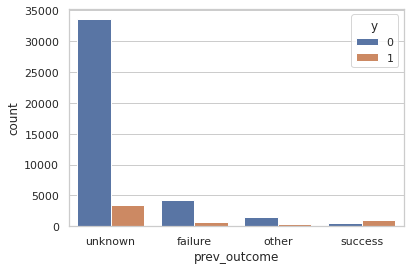

In [193]:
for i, predictor in enumerate(df.drop(columns=['y', 'age', 'num_calls','day','dur'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='y')

label encoding the data

In [194]:
df2=df
df2.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5,may,261,1.0,unknown,0
1,44.0,technician,single,secondary,unknown,5,may,151,1.0,unknown,0
2,33.0,entrepreneur,married,secondary,unknown,5,may,76,1.0,unknown,0
3,47.0,blue-collar,married,unknown,unknown,5,may,92,1.0,unknown,0
4,33.0,unknown,single,unknown,unknown,5,may,198,1.0,unknown,0


In [195]:
df2.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [196]:

df2['job']=df['job'].map({'management':1, 'technician':2, 'entrepreneur':3, 'blue-collar':4, 'unknown':5,
 'retired':6, 'admin.':7, 'services':8, 'self-employed':9, 'unemployed':10, 'housemaid':11,
 'student':12})

In [197]:
df2['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3});
df2['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3, 'unknown':4});
df2['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar':12});
df2['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3});
df2['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4});

In [198]:
df2.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [199]:
df2.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,1,1,3,1,5,1,261,1.0,1,0
1,44.0,2,3,2,1,5,1,151,1.0,1,0
2,33.0,3,1,2,1,5,1,76,1.0,1,0
3,47.0,4,1,4,1,5,1,92,1.0,1,0
4,33.0,5,3,4,1,5,1,198,1.0,1,0


defining features x and traget y

In [200]:
x= df2.drop('y',axis=1)


In [201]:
y=df2['y']


spliting the data

In [202]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

In [203]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 5 )

In [215]:
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

In [216]:
classification_report(y_test, y_pred, labels=[0,1])


'              precision    recall  f1-score   support\n\n           0       0.88      1.00      0.94      7968\n           1       0.86      0.02      0.03      1073\n\n    accuracy                           0.88      9041\n   macro avg       0.87      0.51      0.49      9041\nweighted avg       0.88      0.88      0.83      9041\n'

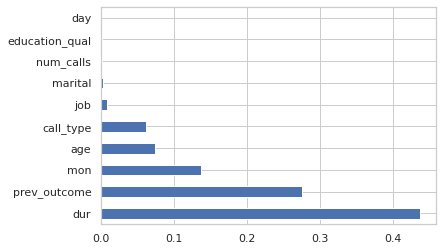

In [217]:
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

duration, previous outcome, month, call_type and age are few imporatant features 

In [218]:
auc = roc_auc_score(y_test, y_pred)
auc

0.5081994450308223

AUROC value is very less than expecteds so trying other *models* for better prediction and auroc and balancing the data

using clusterd centroded undersampling and SMOTE oversampling technique to balance the imbalanced data

In [212]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [213]:
import imblearn
from imblearn.combine import SMOTEENN
from matplotlib import pyplot as plt

In [219]:
smt = SMOTEENN(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(x_train, y_train)


using random forset with balanced data

In [223]:
from sklearn.model_selection import cross_val_score 
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf2= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   
  rf2.fit(x_smt, y_smt) 
  #rf2= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   
  valAccuracy = cross_val_score(rf, x_smt, y_smt, cv=10)
  print("Depth  : ", depth, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Cross val score :  0.8680117367181092
Depth  :  2  Cross val score :  0.8675387580734126
Depth  :  3  Cross val score :  0.867320443942031
Depth  :  4  Cross val score :  0.8669199740814031
Depth  :  5  Cross val score :  0.8701220481781912
Depth  :  6  Cross val score :  0.8666290717260361
Depth  :  7  Cross val score :  0.8685575187365663
Depth  :  8  Cross val score :  0.8670656668888336
Depth  :  9  Cross val score :  0.868157250785727
Depth  :  10  Cross val score :  0.8681937269475292


Depth value 5 has the best cross val score

In [224]:
rf3= RandomForestClassifier(max_depth=5,n_estimators=100,max_features="sqrt")   
rf3.fit(x_smt, y_smt) 
  

RandomForestClassifier(max_depth=5)

In [225]:
y_pred_rf3=rf3.predict(x_test)

In [226]:
auc = roc_auc_score(y_test, y_pred_rf3)
auc

0.819875669967849

Confusion matrix:
 [[5803 2165]
 [  95  978]]


<ipython-input-227-1cd7a8ab8d30>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-227-1cd7a8ab8d30>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


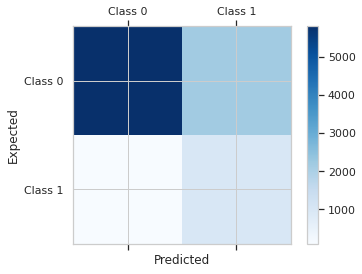

In [227]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_rf3)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

with ~82% auroc value the model is performs better than the model devloped on unbalaced data


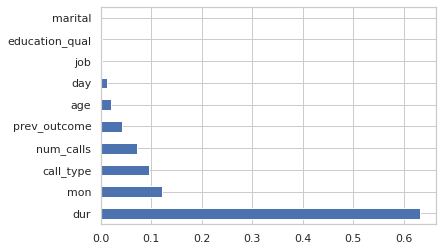

In [228]:
feat_importances = pd.Series(rf3.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

duration, month, c

In [231]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0)  
  model.fit(x_smt,y_smt) 
  print("Learning rate : ", lr," Train score : ", model.score(x_smt,y_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))
     

Learning rate :  0.01  Train score :  0.91021885858788  Cross-Val score :  0.8987951645235416
Learning rate :  0.02  Train score :  0.9245911183073481  Cross-Val score :  0.8991267784677064
Learning rate :  0.03  Train score :  0.9363800098240762  Cross-Val score :  0.9001217425316577
Learning rate :  0.04  Train score :  0.9471683009805884  Cross-Val score :  0.8989049283723659
Learning rate :  0.05  Train score :  0.9526261211272218  Cross-Val score :  0.900011000831174
Learning rate :  0.1  Train score :  0.965888624083541  Cross-Val score :  0.9000121009142912
Learning rate :  0.11  Train score :  0.9697272909200065  Cross-Val score :  0.8996797535813817
Learning rate :  0.12  Train score :  0.9696909054523624  Cross-Val score :  0.9001225981518604
Learning rate :  0.13  Train score :  0.9723834300580348  Cross-Val score :  0.9000121009142914
Learning rate :  0.14  Train score :  0.9741845107064239  Cross-Val score :  0.8982420671784089
Learning rate :  0.15  Train score :  0.97607

at learning rate of 0.1 the model has best cross_validation_score

In [232]:
xgbmodel = xgb.XGBClassifier(learning_rate = 0.1, n_estimators=100, verbosity = 0)  
xgbmodel.fit(x_smt,y_smt) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [233]:
y_pred_xg=xgbmodel.predict(x_test)

In [234]:
auc = roc_auc_score(y_test, y_pred_xg)
auc

0.8485390186093862

xgboost model perfroms better than random forest and has auroc value 85%

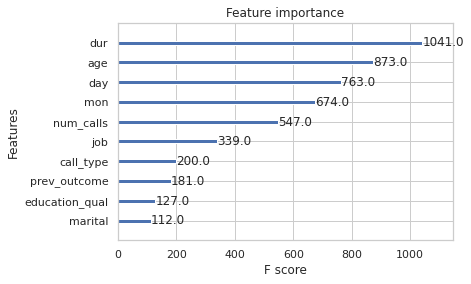

In [235]:
from xgboost import plot_importance

# plot feature importance
plot_importance(xgbmodel)
plt.show()

**conclusion** : Duration, age, day, month, job and num_calls are important features